<a href="https://colab.research.google.com/github/Estefanos8080/CSC508_rf_project/blob/main/Estefanos_rf_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import packages and load data



In [99]:
# import packages
import pandas as pd
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

# Load the data
columns = ["Age","Sex","Chest_pain_type","At_rest_bp","Cholesterol","Fast_blood_sug","Rest_ecg","Maxhr","Exer_angina","Oldpeak","Slope","Ca","Thal","Diag"]
#cleveland_data = pd.read_csv('https://raw.githubusercontent.com/kusabhadranv/gSTARdataset/main/processed.cleveland.data',header=None, names=columns)
hungarian_data = pd.read_csv('https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/processed.hungarian.data.txt',header=None,names=columns )
# THe data was collected by the UCI. The database contains 76 attributes. 
print(hungarian_data)


     Age  Sex  Chest_pain_type At_rest_bp Cholesterol Fast_blood_sug Rest_ecg  \
0     28    1                2        130         132              0        2   
1     29    1                2        120         243              0        0   
2     29    1                2        140           ?              0        0   
3     30    0                1        170         237              0        1   
4     31    0                2        100         219              0        1   
..   ...  ...              ...        ...         ...            ...      ...   
289   52    1                4        160         331              0        0   
290   54    0                3        130         294              0        1   
291   56    1                4        155         342              1        0   
292   58    0                2        180         393              0        0   
293   65    1                4        130         275              0        1   

    Maxhr Exer_angina  Oldp

# Get the missing data and impute them with the median

get the median

In [100]:
print("The median is", hungarian_data.median()[0])

The median is 49.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [101]:
# the value of the missing data is ?.
hungarian_data = hungarian_data.replace('?', 49)
# hungarian_data['Thal'] = hungarian_data['Thal'].fillna(hungarian_data['Thal'].median())
# hungarian_data['Ca'] = hungarian_data['Ca'].fillna(hungarian_data['Ca'].median())
print((hungarian_data== '?').sum())
# print("The median is", hungarian_data.median())

Age                0
Sex                0
Chest_pain_type    0
At_rest_bp         0
Cholesterol        0
Fast_blood_sug     0
Rest_ecg           0
Maxhr              0
Exer_angina        0
Oldpeak            0
Slope              0
Ca                 0
Thal               0
Diag               0
dtype: int64


columns with missing value ares are At_rest_bp, Cholesterol, fast_blood_sug, rest_ecg, Maxhr,
Exer_angina, Slope, Ca, and Thal.
instead of replacing them with the median i decide to drop the columns. 

# But the accuracy was too low(~ 69%)so i decide to impute the missing value with the median.
uncomment and rerun the model to train without those features.


In [102]:
# print("After droping columns with missing value. Here are the features that i will be working on.")
# hungarian_data = hungarian_data.drop(columns=['At_rest_bp', 'Cholesterol', 'Fast_blood_sug', 'Rest_ecg', 'Maxhr', 'Exer_angina','Slope','Ca','Thal'])
# print((hungarian_data== '?').sum())

## Get the dimension

In [103]:
print("The dimension is:- ", hungarian_data.shape)

The dimension is:-  (294, 14)


## split the data from features and training
The predicted label is Diag. We have to separate the label from the dataset then convert the label to binary values. That make the model to be trained to predict wheater heart disease is absence or presence.

In [104]:
labels = np.array(hungarian_data["Diag"])
labels = np.where(labels >= 1,1,0)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Drop the diag labels then use the dataset to train the model then use the remaing dataset to train the model.

In [105]:
features = hungarian_data.drop(columns=['Diag'])
print(features)

     Age  Sex  Chest_pain_type At_rest_bp Cholesterol Fast_blood_sug Rest_ecg  \
0     28    1                2        130         132              0        2   
1     29    1                2        120         243              0        0   
2     29    1                2        140          49              0        0   
3     30    0                1        170         237              0        1   
4     31    0                2        100         219              0        1   
..   ...  ...              ...        ...         ...            ...      ...   
289   52    1                4        160         331              0        0   
290   54    0                3        130         294              0        1   
291   56    1                4        155         342              1        0   
292   58    0                2        180         393              0        0   
293   65    1                4        130         275              0        1   

    Maxhr Exer_angina  Oldp

we have to convert the dataframe into Numpy array so that the algorthim process it.

In [106]:
features = np.array(features)
print(features)

[[28 1 2 ... 49 49 49]
 [29 1 2 ... 49 49 49]
 [29 1 2 ... 49 49 49]
 ...
 [56 1 4 ... '2' 49 49]
 [58 0 2 ... '2' 49 '7']
 [65 1 4 ... '2' 49 49]]


get the number of missing value

In [119]:
# Method created by Estefanos
def count_missing_value(features):
  number_of_missingValues = 0
  for each_value in features:
    for index in each_value:
      if index == 49:
        number_of_missingValues += 1
  return number_of_missingValues

print(count_missing_value(features))  

797


Seperating the training and testing data. 
test_size=0.3. Gives the propotion of the dataset to include in the test set. 0.3 represents 30%. 
random_state = 1 Random state ensures that the splits that you generate are reproducible. 

Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order. 

In [107]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print("######### Train labels ###########")
print(train_labels)
print(" ")
print("######### Sample Test features ##########")
print(test_features[0])
print(" ")
print("######## Test labels ############")
print(test_labels)

######### Train labels ###########
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1
 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0]
 
######### Sample Test features ##########
[39 1 2 '120' '204' '0' '0' '145' '0' 0.0 49 49 49]
 
######## Test labels ############
[0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0
 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1]


## Train the data using the test lables

In [108]:
rf = RandomForestClassifier(n_estimators = 10000, max_features = 10, bootstrap = True, random_state = 2)
rf.fit(train_features, train_labels)
print(rf)

RandomForestClassifier(max_features=10, n_estimators=10000, random_state=2)


# predicting and looking at the accuracy of the data

In [90]:
predictions = rf.predict(test_features)
print(predictions)

[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1]


# Visualize the result using confusin matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


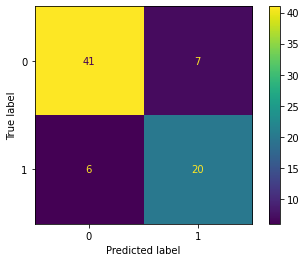

In [91]:
metrics.confusion_matrix(test_labels, predictions)
metrics.plot_confusion_matrix(rf, test_features, test_labels)

calcualting the accuracy

In [92]:
acc = round(100*metrics.accuracy_score(predictions, test_labels),2)
print("Accuracy:",acc,"%")

Accuracy: 82.43 %


## change the hyperparameters to see if the accuracy improves

n_estimator = 10000 and max_features == 10

In [118]:
# The max number of features <= 14
rf = RandomForestClassifier(n_estimators = 10000, max_features = 13 , bootstrap = True, random_state = 2)
rf.fit(train_features, train_labels)
print(rf)

RandomForestClassifier(max_features=13, n_estimators=10000, random_state=2)


get the prediction

In [82]:
predictions = rf.predict(test_features)
print(predictions)

[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1]


Get the accuracy

In [83]:
acc = round(100*metrics.accuracy_score(predictions, test_labels),2)
print("Accuracy:",acc,"%")

Accuracy: 82.43 %
